## Activity 07
### Tyler Barna

In [2]:
## import modules (running on python 3.9.12)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pymc3 as pm
import random
import scipy
import seaborn as sns


import scipy.stats as stats
from scipy.stats import betabinom
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import invgamma
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t
from scipy.stats import uniform
from scipy.stats import multivariate_normal as mvn

from astropy.io import fits
from astropy.io import ascii
cm = plt.cm.get_cmap('RdYlBu')

## set seed for reproducibility
random.seed(5731) 

## import data
ceph_df = pd.read_csv('./cepheid_data.csv')
plane_df = pd.read_csv('./fundamental_plane_kpc.csv')

display(ceph_df.describe())
display(plane_df.describe())

,angDist,_RAJ2000,_DEJ2000,Period,Vmag,E_B-V_,__Fe_H_3,_RA,_DE,recno,id,RA_ICRS,DE_ICRS,rest,b_rest,B_rest,rlen,ResFlag,ModFlag
count,449.000000,449.000000,449.000000,449.00000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.0,449.0
mean,0.073825,184.039867,3.004844,8.68835,10.099597,0.559457,0.038909,184.039867,3.004843,226.701559,3.310859e+18,184.039853,3.004840,3191.552341,2758.372055,3789.578861,1372.083476,1.0,1.0
std,0.087028,105.533720,44.913304,8.77079,2.228622,0.322800,0.120358,105.533720,44.913303,130.509784,1.930746e+18,105.533723,44.913298,2158.408040,1731.349807,2778.791662,324.601675,0.0,0.0
min,0.001847,0.246827,-70.151790,0.92200,3.700000,0.025000,-0.680000,0.246830,-70.151790,1.000000,1.744891e+17,0.246799,-70.151795,242.276663,239.525677,245.090419,532.061183,1.0,1.0
25%,0.030049,98.477540,-42.568157,4.19800,8.630000,0.310000,0.000000,98.477540,-42.568160,114.000000,2.006989e+18,98.477542,-42.568144,1734.914094,1604.356619,1890.889795,1141.923825,1.0,1.0
50%,0.062153,165.566940,4.073567,5.89800,10.220000,0.530000,0.000000,165.566930,4.073570,227.000000,3.346585e+18,165.566882,4.073569,2750.256043,2459.193623,3061.745368,1332.591144,1.0,1.0
75%,0.098141,286.692320,45.478615,10.14200,11.810000,0.735000,0.110000,286.692320,45.478620,339.000000,5.324035e+18,286.692301,45.478606,4118.178972,3515.011129,4949.375917,1563.934923,1.0,1.0
max,1.000589,359.574900,68.888504,96.29000,14.400000,2.059000,0.470000,359.574900,68.888500,452.000000,6.060173e+18,359.574871,68.888467,12888.728001,10516.199583,16310.235952,2486.181213,1.0,1.0


,ID,A_R,LogRe,mue,logSigma,eLogSigma,velocity,Type
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,49.640401,0.162911,0.526437,19.486920,2.254963,0.026850,7971.922636,-3.717765
std,28.808444,0.124168,0.305982,0.768645,0.150534,0.009911,3027.429422,1.392437
min,0.000000,0.015000,-0.385867,17.020000,1.720000,0.008000,2089.000000,-5.000000
25%,25.000000,0.060250,0.337553,18.982500,2.155250,0.020000,5413.500000,-5.000000
50%,50.000000,0.144000,0.510618,19.450000,2.273000,0.026000,7869.000000,-4.000000
75%,74.750000,0.209000,0.701511,19.940000,2.365000,0.033500,9951.000000,-2.000000
max,99.000000,0.605000,1.830392,22.550000,2.600000,0.056000,15799.000000,-2.000000


Let's fit a linear model to our data

shape of X:  (698, 2)
shape of y:  (698,) 

mle estimator:  [[-5.42918448  0.30562147]]


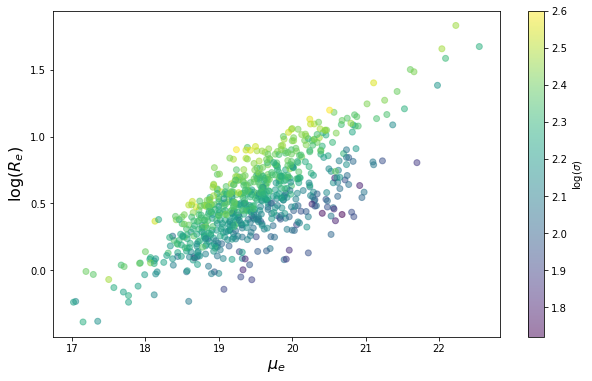

In [23]:
## setup matrices
x, y = (plane_df['mue'], 
        plane_df['LogRe']) 
x2 = plane_df['logSigma']
X = np.matrix([np.ones(x.shape[0]), x]).T

print('shape of X: ',X.shape)
print('shape of y: ',y.shape,'\n')

## mle estimator
p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('mle estimator: ',p_mat)

## define xx and yy variable for plotting
xx = np.linspace(17, 23, 100)
yy = np.array(p_mat[0,0] + p_mat[0,1]*xx)

fig, ax = plt.subplots(figsize=(10, 6),facecolor='white')
ax.set_xlabel(r'$\mu_e$',fontsize=16)
ax.set_ylabel(r'$\log(R_e)$',fontsize=16)

scat = ax.scatter(x, y, c=x2, alpha=0.5)
cbat = plt.colorbar(scat)
cbat.set_label(r'log($\sigma$)')

logSigma = np.arange(16,23,100)
#ax.plot(logSigma, 1)